Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from no import no_ids
from yes import yes_ids

In [3]:
data_df = pd.read_csv('data.csv')

data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


Data tidak lengkap, karena tidak ada judul lagu. Maka, saya akan buat sebuah DataFrame baru dengan cara:

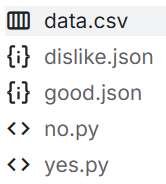

1. Lagu Disliked:
- Ambil data features dari dislike.json
- Lalu, ambil data judul lagu dari no.py berdasarkan id lagu tersebut
- Buat menjadi DataFrame baru (df_dislike)

2. Lagu Liked:
- Ambil data features dari good.json
- Lalu, ambil data judul lagu dari yes.py berdasarkan id lagu tersebut
- Buat menjadi DataFrame baru (df_like)

3. Concat kedua DataFrame tersebut menjadi 1 DataFrame utama.

In [4]:
# DISLIKED SONGS

# load dislike.json (contains danceability, energy, etc.)
with open("dislike.json", "r") as file:
    dislike_data = json.load(file)

# get tracks from no.py
tracks = {item["track"]["id"]: item["track"]["name"] for item in no_ids["items"]}

# convert to df
df_dislike = pd.DataFrame(dislike_data["audio_features"])

# add 'song_name' from no.py based on 'id'
df_dislike["song_name"] = df_dislike["id"].map(tracks)

# reorder columns
df_dislike = df_dislike[["id", "song_name"] + [col for col in df_dislike.columns if col not in ["id", "song_name"]]]

df_dislike.head()

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4pFC6tuWErxbO61oFFq3BQ,Hammer Smashed Face,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843,0.0768,0.368,96.969,audio_features,spotify:track:4pFC6tuWErxbO61oFFq3BQ,https://api.spotify.com/v1/tracks/4pFC6tuWErxb...,https://api.spotify.com/v1/audio-analysis/4pFC...,242760,4
1,6V3SNkvi4BnfmZU0j7s9TQ,Scourge of Iron,0.446,0.977,10,-5.036,0,0.0781,0.000535,0.472,0.1050,0.339,172.059,audio_features,spotify:track:6V3SNkvi4BnfmZU0j7s9TQ,https://api.spotify.com/v1/tracks/6V3SNkvi4Bnf...,https://api.spotify.com/v1/audio-analysis/6V3S...,284400,4
2,1Ds58cpyJzL0YTKk02vh1C,Evisceration Plague,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091,0.1020,0.257,79.792,audio_features,spotify:track:1Ds58cpyJzL0YTKk02vh1C,https://api.spotify.com/v1/tracks/1Ds58cpyJzL0...,https://api.spotify.com/v1/audio-analysis/1Ds5...,270920,4
3,77QKNMGwlnzxsTZPYfByMu,Necrogenic Resurrection,0.462,0.974,1,-5.820,1,0.0816,0.000029,0.723,0.0751,0.399,107.877,audio_features,spotify:track:77QKNMGwlnzxsTZPYfByMu,https://api.spotify.com/v1/tracks/77QKNMGwlnzx...,https://api.spotify.com/v1/audio-analysis/77QK...,186576,3
4,3bQoMbPYOvvseHaSOWAQ3Q,I Cum Blood,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833,0.0377,0.449,99.046,audio_features,spotify:track:3bQoMbPYOvvseHaSOWAQ3Q,https://api.spotify.com/v1/tracks/3bQoMbPYOvvs...,https://api.spotify.com/v1/audio-analysis/3bQo...,221960,4


In [5]:
# LIKED SONGS

# load good.json (contains danceability, energy, etc.)
with open("good.json", "r") as file:
    like_data = json.load(file)

# get tracks from yes.py
tracks = {item["track"]["id"]: item["track"]["name"] for item in yes_ids["items"]}

# convert to df
df_like = pd.DataFrame(like_data["audio_features"])

# add 'song_name' from yes.py based on 'id'
df_like["song_name"] = df_like["id"].map(tracks)

# reorder columns
df_like = df_like[["id", "song_name"] + [col for col in df_like.columns if col not in ["id", "song_name"]]]

df_like.head()

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,55mcupbf7cIsuCEVAuTJVk,OVGTC - Star Wars remix,0.749,0.839,6,-4.847,1,0.297,0.0867,0.000000,0.2040,0.804,172.068,audio_features,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4
1,57RtLWT7IpugV0yi5bsxJk,Rêves de môme,0.573,0.581,10,-9.026,0,0.339,0.7530,0.000001,0.1300,0.351,76.506,audio_features,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4
2,5VyfAfp2Yt3qaeuvq55ll3,4 millions,0.800,0.719,7,-6.262,1,0.234,0.1090,0.000000,0.0580,0.815,143.975,audio_features,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4
3,3eWHY75nDgte70hh5yf4UW,Bandana mauve,0.778,0.632,8,-6.415,1,0.125,0.0404,0.000000,0.0912,0.827,140.951,audio_features,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4
4,2UwrB6Ge6mPfUV8yGvAfX7,Brothers (Remix Rilès),0.797,0.852,8,-5.202,1,0.241,0.0555,0.000024,0.0536,0.480,136.035,audio_features,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4


In [6]:
# COMBINE df_like & df_dislike

df = pd.concat([df_like, df_dislike], ignore_index=True)

# delete unused columns
df = df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'])

df

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,55mcupbf7cIsuCEVAuTJVk,OVGTC - Star Wars remix,0.749,0.839,6,-4.847,1,0.2970,0.0867,0.000000,0.2040,0.804,172.068,111000,4
1,57RtLWT7IpugV0yi5bsxJk,Rêves de môme,0.573,0.581,10,-9.026,0,0.3390,0.7530,0.000001,0.1300,0.351,76.506,169347,4
2,5VyfAfp2Yt3qaeuvq55ll3,4 millions,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,230854,4
3,3eWHY75nDgte70hh5yf4UW,Bandana mauve,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,224029,4
4,2UwrB6Ge6mPfUV8yGvAfX7,Brothers (Remix Rilès),0.797,0.852,8,-5.202,1,0.2410,0.0555,0.000024,0.0536,0.480,136.035,102353,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1QqsAlhs7pxcXs9BMB1Nv5,"Disco Inferno - LP / 12"" Version",0.798,0.746,10,-8.639,1,0.0313,0.0304,0.361000,0.0703,0.965,128.553,655213,4
191,6VuIKS2Z27jCutIapgCUZF,Shake Your Body,0.651,0.811,10,-13.870,1,0.0318,0.0648,0.029300,0.1000,0.962,112.126,186573,4
192,7sMGwiS4vOMcz86ZY3vKYM,Girls Just Want to Have Fun,0.705,0.847,6,-2.588,1,0.0361,0.4140,0.000003,0.4060,0.743,120.527,228120,4
193,4JsQkSOE4taeyhH3pv1een,Self Control,0.819,0.811,6,-7.760,0,0.0349,0.2030,0.005580,0.1390,0.766,106.684,246760,4


Intinya df sama saja dengan data_df, hanya ada tambahan column 'id' dan 'song_name' saja. Tidak ada column 'liked', karena ini bukan classification, jadi tidak perlu.

In [7]:
df.to_csv("spotify.csv", index=False)

## Exploratory Data Analysis (EDA)

<Axes: >

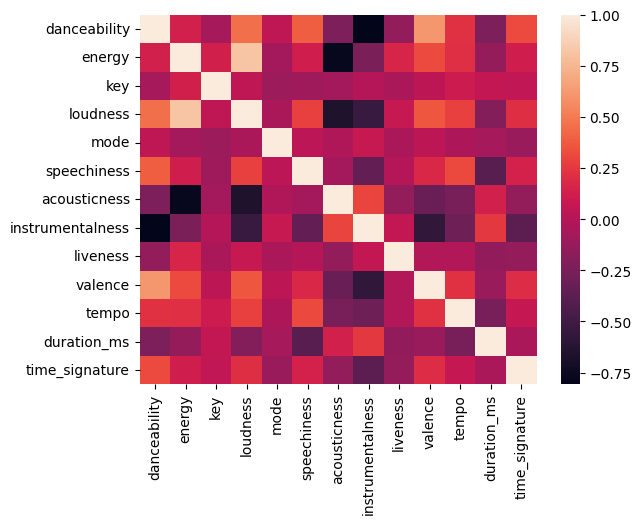

In [8]:
# show heatmap

sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False)

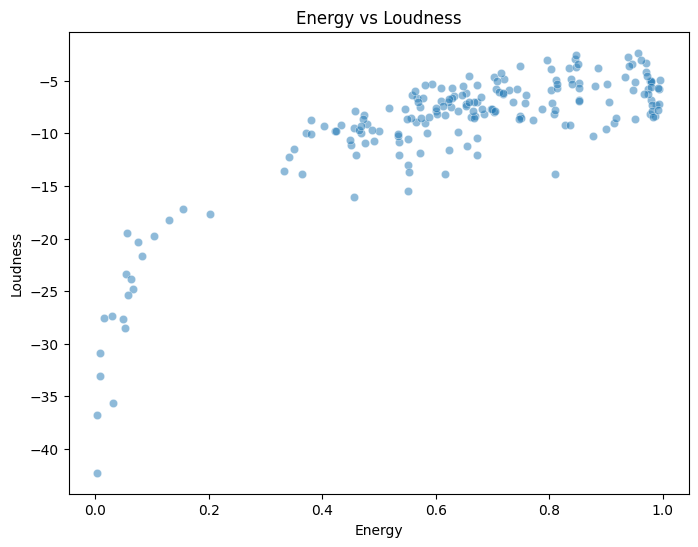

In [9]:
# Scatterplot to see is there any correlation between energy and loudness

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["energy"], y=df["loudness"], alpha=0.5)
plt.title("Energy vs Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

Berdasarkan visualisasi, terdapat korelasi positif (relatif/cukup kuat) antara energy dan loudness sebuah lagu. Jika energy kecil, maka loudness juga akan cenderung kecil. Sebaliknya, jika energy besar, maka harga loudness akan cenderung besar.

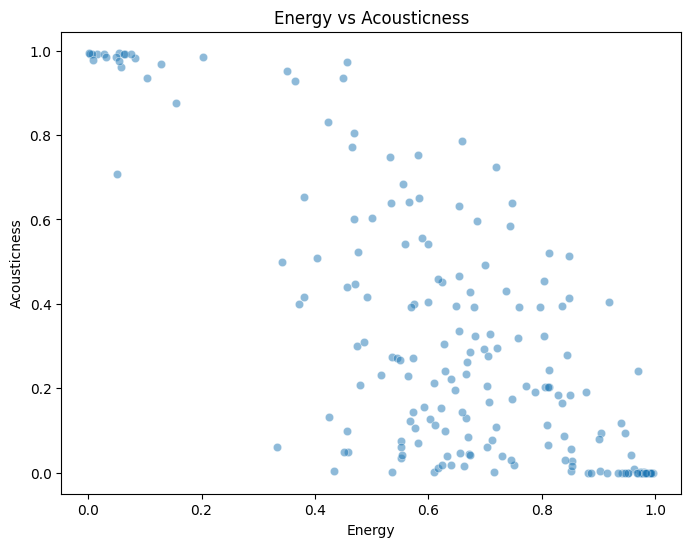

In [10]:
# Scatterplot to see is there any correlation between energy and accousticness

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["energy"], y=df["acousticness"], alpha=0.5)
plt.title("Energy vs Acousticness")
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.show()

Berdasarkan visualisasi, terdapat korelasi negatif (tetapi relatif lemah) antara energy dan acousticness sebuah lagu. Jika energy sebuah lagu besar, maka lagu tersebut cenderung tidak acoustic. Sedangkan jika energy sebuah lagu kecil, maka lagu tersebut cenderung acoustic.

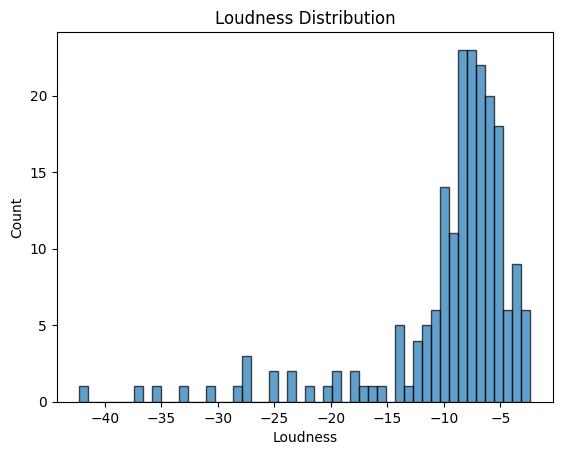

In [11]:
# show the distribution of loudness

plt.hist(df.loudness, bins=50, edgecolor='black', alpha=0.7)
plt.title("Loudness Distribution")
plt.xlabel("Loudness")
plt.ylabel("Count")
plt.show()

Bisa dilihat loudness terdistribusi secara left-skewed, artinya mayoritas musik bisa dikatakan lumayan keras suaranya (loud).

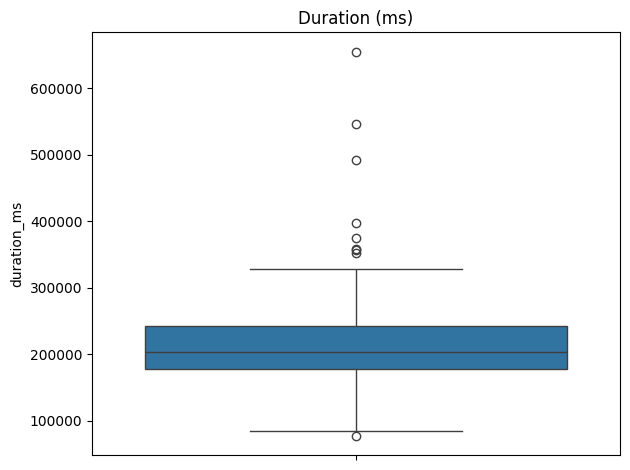

In [12]:
# Boxplot of song duration

sns.boxplot(df['duration_ms'])
plt.title("Duration (ms)")
plt.tight_layout()
plt.show()

Median dari duration yaitu di sekitar 200000 ms (3 menit 20 detik)

Durasi musik cukup bervariasi.

Terdapat outliers, di mana ada musik yang durasinya cukup lama yaitu ada yang di atas 10 menit dan di bawah 2 menit.

## Data Preprocessing

In [13]:
# check data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                195 non-null    object 
 1   song_name         195 non-null    object 
 2   danceability      195 non-null    float64
 3   energy            195 non-null    float64
 4   key               195 non-null    int64  
 5   loudness          195 non-null    float64
 6   mode              195 non-null    int64  
 7   speechiness       195 non-null    float64
 8   acousticness      195 non-null    float64
 9   instrumentalness  195 non-null    float64
 10  liveness          195 non-null    float64
 11  valence           195 non-null    float64
 12  tempo             195 non-null    float64
 13  duration_ms       195 non-null    int64  
 14  time_signature    195 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 23.0+ KB


In [14]:
# check sum of missing values for each column in data

df.isna().sum()

,0
id,0
song_name,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0


In [15]:
# check if there is duplicate values in data

df.duplicated().sum()

np.int64(0)

In [16]:
# describe data

df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000


In [17]:
df.head()

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,55mcupbf7cIsuCEVAuTJVk,OVGTC - Star Wars remix,0.749,0.839,6,-4.847,1,0.297,0.0867,0.000000,0.2040,0.804,172.068,111000,4
1,57RtLWT7IpugV0yi5bsxJk,Rêves de môme,0.573,0.581,10,-9.026,0,0.339,0.7530,0.000001,0.1300,0.351,76.506,169347,4
2,5VyfAfp2Yt3qaeuvq55ll3,4 millions,0.800,0.719,7,-6.262,1,0.234,0.1090,0.000000,0.0580,0.815,143.975,230854,4
3,3eWHY75nDgte70hh5yf4UW,Bandana mauve,0.778,0.632,8,-6.415,1,0.125,0.0404,0.000000,0.0912,0.827,140.951,224029,4
4,2UwrB6Ge6mPfUV8yGvAfX7,Brothers (Remix Rilès),0.797,0.852,8,-5.202,1,0.241,0.0555,0.000024,0.0536,0.480,136.035,102353,4


## Model (Content-based Filtering)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

main_df = df.drop(columns=['id', 'song_name'])

scaler = StandardScaler()
main_df = scaler.fit_transform(main_df)

cosine_sim = cosine_similarity(main_df)

def recommend_songs(song_name, n):
  index = df[df['song_name'] == song_name].index[0]
  distances = list(enumerate(cosine_sim[index]))
  distances = sorted(distances, key=lambda x: x[1], reverse=True)

  print(f"Song recommendations for: {song_name}")

  # get top n songs
  for i, song_data in enumerate(distances[1:n+1]):
    print(f"{i+1}. {df.iloc[song_data[0]]['song_name']} \nSimilarity: {song_data[1]:.2f}\n")

In [19]:
cosine_sim

array([[ 1.        , -0.22188124,  0.67395753, ...,  0.3048021 ,
        -0.10976471,  0.20282972],
       [-0.22188124,  1.        , -0.24815944, ..., -0.25191413,
        -0.08738665, -0.15760963],
       [ 0.67395753, -0.24815944,  1.        , ...,  0.06038545,
         0.16484196, -0.07337443],
       ...,
       [ 0.3048021 , -0.25191413,  0.06038545, ...,  1.        ,
         0.27161104,  0.64302107],
       [-0.10976471, -0.08738665,  0.16484196, ...,  0.27161104,
         1.        ,  0.65168918],
       [ 0.20282972, -0.15760963, -0.07337443, ...,  0.64302107,
         0.65168918,  1.        ]])

In [20]:
df.iloc[123]['song_name']

'Surround, Kill, Devour'

In [27]:
recommend_songs("Surround, Kill, Devour", 5)

Song recommendations for: Surround, Kill, Devour
1. Hammer Smashed Face 
Similarity: 0.86

2. Inhumane Harvest 
Similarity: 0.84

3. Code of the Slashers 
Similarity: 0.75

4. Evisceration Plague 
Similarity: 0.72

5. Split Wide Open 
Similarity: 0.69



In [28]:
# try to compare 'Surround, Kill, Devour' and its recommendations

recommended = ["Surround, Kill, Devour", "Hammer Smashed Face", "Inhumane Harvest", "Code of the Slashers", "Evisceration Plague", "Split Wide Open"]
recommended_df = df[df["song_name"].isin(recommended)]
recommended_df

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
100,4pFC6tuWErxbO61oFFq3BQ,Hammer Smashed Face,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843,0.0768,0.368,96.969,242760,4
102,1Ds58cpyJzL0YTKk02vh1C,Evisceration Plague,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091,0.1020,0.257,79.792,270920,4
107,5WGvXmLt6acluR7TfhlHUH,Inhumane Harvest,0.130,0.947,8,-5.888,1,0.0950,0.000024,0.368,0.0453,0.334,60.631,272995,4
108,4YWg4PxJzMn84j7Fo32W4M,Code of the Slashers,0.225,0.980,6,-5.626,1,0.1430,0.000006,0.860,0.0653,0.105,115.077,285907,4
113,1SEE3lvWDlSYVEySrrAfMs,Split Wide Open,0.297,0.993,9,-7.173,1,0.1180,0.000057,0.770,0.0766,0.178,127.693,182427,4
123,3iZOVTPjyUEq9f5HsUQCj7,"Surround, Kill, Devour",0.454,0.968,6,-6.289,1,0.0787,0.000017,0.338,0.0472,0.535,103.965,250262,4


Bisa dikatakan cukup akurat, terlihat dari beberapa features yang rangenya berdekatan satu sama lain.

In [29]:
recommend_songs("Bandana mauve", 3)

Song recommendations for: Bandana mauve
1. OUI 
Similarity: 0.94

2. Shenmue 
Similarity: 0.91

3. 4 millions 
Similarity: 0.90



In [30]:
# try to compare 'Bandana mauve' and its recommendations

recommended = ["Bandana mauve", "OUI", "Shenmue", "4 millions"]
recommended_df = df[df["song_name"].isin(recommended)]
recommended_df

,id,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,5VyfAfp2Yt3qaeuvq55ll3,4 millions,0.800,0.719,7,-6.262,1,0.2340,0.1090,0.000000,0.0580,0.815,143.975,230854,4
3,3eWHY75nDgte70hh5yf4UW,Bandana mauve,0.778,0.632,8,-6.415,1,0.1250,0.0404,0.000000,0.0912,0.827,140.951,224029,4
16,3FVdWR0C2QAqXxhW1al2fT,OUI,0.720,0.670,7,-8.390,1,0.1670,0.0857,0.000000,0.1010,0.766,151.124,209801,4
142,5gqh2FMBquUEwDsRUU4pCF,Shenmue,0.909,0.582,7,-5.357,1,0.0665,0.0696,0.000048,0.0984,0.844,126.063,249598,4


Bisa dikatakan cukup akurat, terlihat dari beberapa features yang rangenya berdekatan satu sama lain.